In [334]:
# import libs 
import pandas as pd
import datetime as dt
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=20)
plt.rcParams['figure.figsize'] = [11, 7]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [355]:
df_raw = pd.read_csv('fin_data.csv' )
df_raw=df_raw.replace({"#DIV/0!": np.nan})
df_raw.columns= df_raw.columns.str.replace(" ", "_")
df_raw['RORAC_(=net_Income/Total_RWA)']=df_raw['RORAC_(=net_Income/Total_RWA)'].astype(np.float)

#df_raw.dtypes
df_raw

,Quarter/Year,Quarter,Quarter_No.,Year,Date,Total_revenue_,Earnings_per_share_(EPS)-basic_,Change_in_earning_per_share_,"Adjusted_revenue_growth_5,_6",Leverage_ratio_-_all-in_basis,...,Total_revenue,Return_on_common_equity_(ROE),Return_on_assets,Return_on_RWA_2,_Capital_charge_,Total_capital_risk-weighted_assets_(RWA),Return_on_risk_capital_(RORC),RORAC_(=net_Income/Total_RWA),Dividend_Payout_Ratio,Sustainable_grough_rate=_ROE*(1-DPR)
0,Q1/08,Q1,1,8,2008-03-01,5647.00,0.96,NaN,-0.009000,NaN,...,5647,0.214,0.007888,0.0000,-594,0,0,NaN,0.520,0.102720
1,Q2/08,Q2,2,8,2008-06-01,4954.00,0.70,0.0,-0.126000,NaN,...,4954,0.156,0.005800,0.0000,-604,0,0,NaN,0.720,0.043680
2,Q3/08,Q3,3,8,2008-09-01,5912.00,0.93,1.0,0.079000,NaN,...,5912,0.194,0.007809,0.0000,-664,0,0,NaN,0.540,0.089240
3,Q4/08,Q4,4,8,2008-12-01,5069.00,0.82,0.0,-0.097000,NaN,...,5069,0.161,0.006579,0.0000,-708,0,0,NaN,0.610,0.062790
4,Q1/09,Q1,1,9,2009-03-01,7063.00,0.78,0.0,0.251000,NaN,...,7063,0.145,0.005945,0.0000,-851,0,0,NaN,0.660,0.049300
5,Q2/09,Q2,2,9,2009-06-01,6761.00,-0.07,0.0,0.365000,NaN,...,6761,-0.014,-0.000300,0.0000,-874,0,0,NaN,0.528,-0.006683
6,Q3/09,Q3,3,9,2009-09-01,7823.00,1.06,1.0,0.323000,NaN,...,7823,0.194,0.009300,0.0000,-917,0,0,NaN,0.470,0.102820
7,Q4/09,Q4,4,9,2009-12-01,7459.00,0.83,0.0,0.471000,NaN,...,7459,0.147,0.007400,0.0000,-941,0,0,NaN,0.600,0.058800
8,Q1/10,Q1,1,10,2010-03-01,7334.00,1.01,1.0,0.038000,NaN,...,7334,0.175,0.009000,0.0000,-923,259016,259016,0.005780,0.500,0.087500
9,Q2/10,Q2,2,10,2010-06-01,6967.00,0.89,0.0,0.030000,NaN,...,6967,0.158,0.008300,0.0000,-905,249269,249269,0.005332,0.560,0.069520


In [356]:
df_raw['RORAC']=np.where(df_raw['RORAC_(=net_Income/Total_RWA)'].diff() >0 , 1, 0)
df_raw['ROE']=np.where(df_raw['Return_on_common_equity_(ROE)'].diff()> 0,1,0)
df_raw['ROA']=np.where(df_raw['Return_on_assets'].diff()> 0,1,0)
df_raw['Sustainable_growth']=np.where(df_raw['Sustainable_grough_rate=_ROE*(1-DPR)'].diff()> 0,1,0)
df_raw

,Quarter/Year,Quarter,Quarter_No.,Year,Date,Total_revenue_,Earnings_per_share_(EPS)-basic_,Change_in_earning_per_share_,"Adjusted_revenue_growth_5,_6",Leverage_ratio_-_all-in_basis,...,_Capital_charge_,Total_capital_risk-weighted_assets_(RWA),Return_on_risk_capital_(RORC),RORAC_(=net_Income/Total_RWA),Dividend_Payout_Ratio,Sustainable_grough_rate=_ROE*(1-DPR),RORAC,ROE,ROA,Sustainable_growth
0,Q1/08,Q1,1,8,2008-03-01,5647.00,0.96,NaN,-0.009000,NaN,...,-594,0,0,NaN,0.520,0.102720,0,0,0,0
1,Q2/08,Q2,2,8,2008-06-01,4954.00,0.70,0.0,-0.126000,NaN,...,-604,0,0,NaN,0.720,0.043680,0,0,0,0
2,Q3/08,Q3,3,8,2008-09-01,5912.00,0.93,1.0,0.079000,NaN,...,-664,0,0,NaN,0.540,0.089240,0,1,1,1
3,Q4/08,Q4,4,8,2008-12-01,5069.00,0.82,0.0,-0.097000,NaN,...,-708,0,0,NaN,0.610,0.062790,0,0,0,0
4,Q1/09,Q1,1,9,2009-03-01,7063.00,0.78,0.0,0.251000,NaN,...,-851,0,0,NaN,0.660,0.049300,0,0,0,0
5,Q2/09,Q2,2,9,2009-06-01,6761.00,-0.07,0.0,0.365000,NaN,...,-874,0,0,NaN,0.528,-0.006683,0,0,0,0
6,Q3/09,Q3,3,9,2009-09-01,7823.00,1.06,1.0,0.323000,NaN,...,-917,0,0,NaN,0.470,0.102820,0,1,1,1
7,Q4/09,Q4,4,9,2009-12-01,7459.00,0.83,0.0,0.471000,NaN,...,-941,0,0,NaN,0.600,0.058800,0,0,0,0
8,Q1/10,Q1,1,10,2010-03-01,7334.00,1.01,1.0,0.038000,NaN,...,-923,259016,259016,0.005780,0.500,0.087500,0,1,1,1
9,Q2/10,Q2,2,10,2010-06-01,6967.00,0.89,0.0,0.030000,NaN,...,-905,249269,249269,0.005332,0.560,0.069520,0,0,0,0


In [357]:
df_raw.columns

Index(['Quarter/Year', 'Quarter', 'Quarter_No.', 'Year', 'Date',
       'Total_revenue_', 'Earnings_per_share_(EPS)-basic_',
       'Change_in_earning_per_share_', 'Adjusted_revenue_growth_5,_6',
       'Leverage_ratio_-_all-in_basis',
       '_Net_income_available_to_common_shareholders__', '_Net_income_',
       '__Economic_profit_3', '_Book_value_per_share__',
       'Common_share_price(RY_on_TSX)'-_High', '#NAME?', '#NAME?.1',
       'Change_in_Share_price_', '_Total_assets__', '_Average_assets__',
       'Number_of_employees_(full-time_equivalent)_1_Canada',
       'Number_of_employees_(full-time_equivalent)_1_US',
       'Number_of_employees_(full-time_equivalent)_1_Other',
       'Number_of_employees_(full-time_equivalent)_1_Total',
       'Number_of_banking_branches__Canada', 'Number_of_banking_branches__US',
       'Number_of_banking_branches__Other_',
       'Number_of_banking_branches_Total',
       'Number_of_automated_teller_machines_(ATMs)',
       'Active_digital_(Online

In [358]:
#List of features and targets 
columns_df= [ 'Total_revenue_', 'Earnings_per_share_(EPS)_basic_',
       'Change_in_earning_per_share_', 'Adjusted_revenue_growth_',
       '__Economic_profit_3', '_Book_value_per_share__', 'High', 'Low',
       'Closing_price_', 'Change_in_Share_price_', '_Total_assets__',
       'Number_of_employees_(full-time_equivalent)_1_Total',
       'Number_of_banking_branches_Total',
       'Number_of_automated_teller_machines_(ATMs)'
, 'Interest_income_', 
       'Non_interest_total' ,'RORAC', 'ROE', 'ROA', 'Sustainable_growth']
df= df_raw.filter(columns_df,axis=1)
#df=df_raw
df=df.dropna()

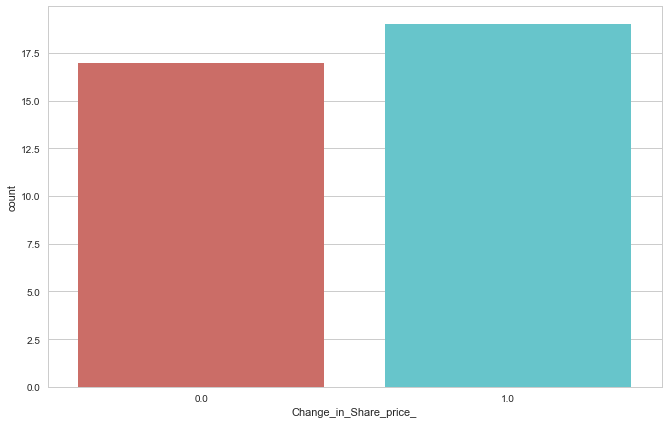

In [359]:
# bar plot for Target varibale : almost 50:50 split 
sns.countplot(x= 'Change_in_Share_price_', data=df, palette='hls')

In [360]:
# summary of target varibale : 1 if positive change in stock price compare to last quarter OR '0'
#df.groupby('Earnings_per_share_(EPS)_basic_').mean()

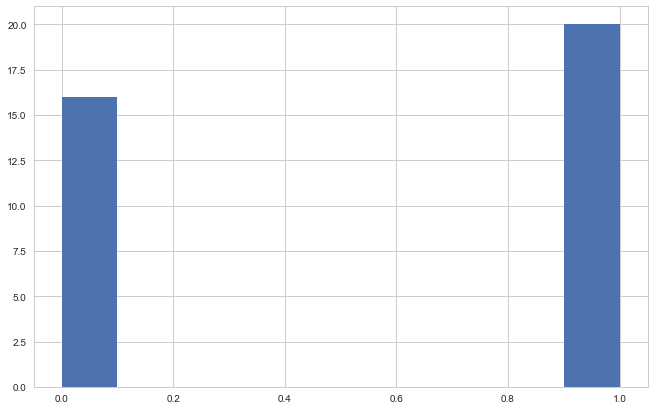

In [361]:
#Stock price histogram: need more data to prove prices are normally ditributed
df.Change_in_earning_per_share_.hist()

In [362]:
# define X and Y for the model 
feature_vectors= [ 'Total_revenue_',  'Change_in_Share_price_',
       '__Economic_profit_3',  '_Total_assets__',
       'Number_of_employees_(full-time_equivalent)_1_Total',
       'Number_of_banking_branches_Total',
       'Number_of_automated_teller_machines_(ATMs)'
       ,'Interest_income_', 
       'Non_interest_total']
# target y
#y= np.array(df['Change_in_earning_per_share_'])
y= df['RORAC']
X= df[feature_vectors]


In [363]:
#SKlearn model for binary classification 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [364]:
# feature scalling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

C:\Users\chetan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\chetan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\chetan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [365]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\chetan.sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [366]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.667


In [367]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5 2]
 [1 1]]


In [368]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.33      0.50      0.40         2

   micro avg       0.67      0.67      0.67         9
   macro avg       0.58      0.61      0.58         9
weighted avg       0.72      0.67      0.69         9



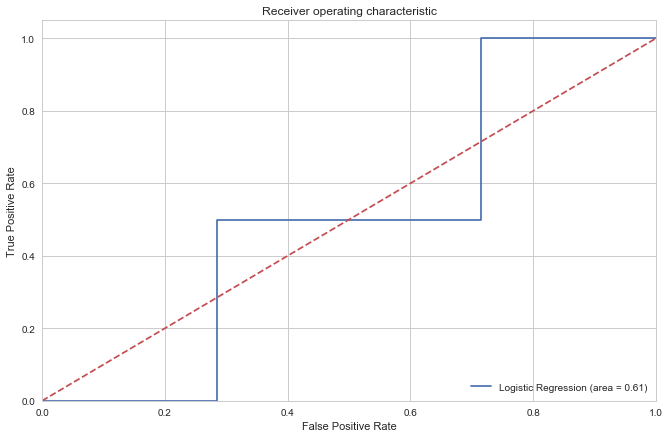

In [369]:
# ROC curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [370]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators=30, random_state=0)  
Classifier.fit(X_train, y_train)  
y_pred = Classifier.predict(X_test)

In [371]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5555555555555556
Mean Squared Error: 0.5555555555555556
Root Mean Squared Error: 0.7453559924999299


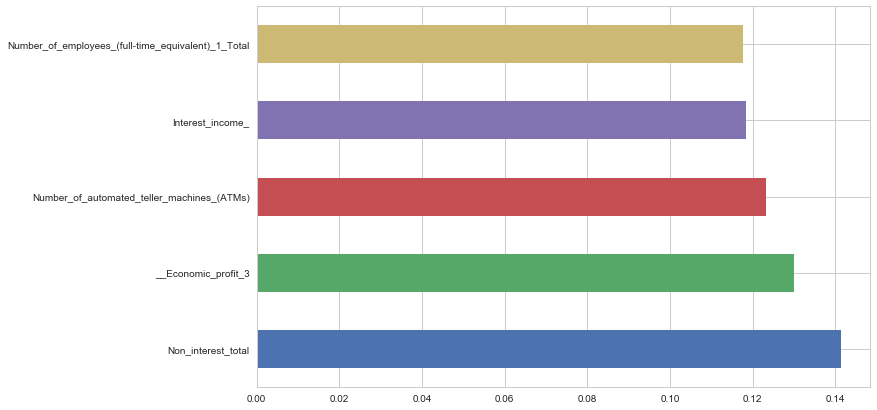

In [372]:
# Feature importance 
feat_importances = pd.Series(Classifier.feature_importances_, index=feature_vectors)
feat_importances.nlargest(5).plot(kind='barh')

In [373]:
cor_df= df.corr()
cor_df.style.background_gradient()

,Total_revenue_,Change_in_earning_per_share_,__Economic_profit_3,_Book_value_per_share__,Change_in_Share_price_,_Total_assets__,Number_of_employees_(full-time_equivalent)_1_Total,Number_of_banking_branches_Total,Number_of_automated_teller_machines_(ATMs),Interest_income_,Non_interest_total,RORAC,ROE,ROA,Sustainable_growth
Total_revenue_,1,0.298221,0.811559,0.947966,0.037979,0.952252,0.8755,-0.294568,-0.202617,0.892721,0.965567,0.117735,0.203401,0.07503,0.0994598
Change_in_earning_per_share_,0.298221,1,0.495143,0.243872,0.161744,0.250056,0.216899,-0.237075,-0.221241,0.32271,0.303875,0.6875,0.846043,0.8,0.846043
__Economic_profit_3,0.811559,0.495143,1,0.806755,0.044966,0.820647,0.774587,-0.588005,-0.131469,0.780612,0.716967,0.379961,0.362682,0.302272,0.345612
_Book_value_per_share__,0.947966,0.243872,0.806755,1,-0.0153832,0.988014,0.869746,-0.345092,-0.271636,0.915997,0.849946,0.116022,0.105126,0.0342566,0.0617631
Change_in_Share_price_,0.037979,0.161744,0.044966,-0.0153832,1,-0.0123542,0.0331764,0.0189651,0.121361,0.00898878,0.0386306,0.174185,0.114551,0.174185,0.00309598
_Total_assets__,0.952252,0.250056,0.820647,0.988014,-0.0123542,1,0.850476,-0.390597,-0.250987,0.895543,0.857667,0.132444,0.119747,0.0239879,0.0827368
Number_of_employees_(full-time_equivalent)_1_Total,0.8755,0.216899,0.774587,0.869746,0.0331764,0.850476,1,-0.196691,0.0356953,0.883476,0.779645,0.104643,0.135143,0.0668102,0.0543385
Number_of_banking_branches_Total,-0.294568,-0.237075,-0.588005,-0.345092,0.0189651,-0.390597,-0.196691,1,0.448816,-0.341117,-0.222853,-0.30521,-0.153905,-0.136419,-0.163289
Number_of_automated_teller_machines_(ATMs),-0.202617,-0.221241,-0.131469,-0.271636,0.121361,-0.250987,0.0356953,0.448816,1,-0.34443,-0.226103,-0.224171,-0.188894,-0.115894,-0.123811
Interest_income_,0.892721,0.32271,0.780612,0.915997,0.00898878,0.895543,0.883476,-0.341117,-0.34443,1,0.81021,0.11625,0.19272,0.0963554,0.119311
